<a href="https://colab.research.google.com/github/hsaine/Projet_final_ML/blob/main/projet_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Covid.zip

unzip:  cannot find or open Covid.zip, Covid.zip.zip or Covid.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
#stocker la base de donnée 
df_path='/Covid Data.csv'


In [ ]:
#lire la base de donnée
df=pd.read_csv(df_path) 
#pour voir les Paramètres statistiques
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [ ]:
#@title
#pour voir les 5 premiers patients
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
#la taille de base de donnée
df.shape

(1048575, 21)

In [ ]:
#l’étiquetage 
df.loc[df['DATE_DIED'] != '9999-99-99'] = '1'
df = df.replace('9999-99-99','0')


In [ ]:
# decouvrir le type de donnée des varibles de notre base de donnée
df.dtypes

USMER                   object
MEDICAL_UNIT            object
SEX                     object
PATIENT_TYPE            object
DATE_DIED               object
INTUBED                 object
PNEUMONIA               object
AGE                     object
PREGNANT                object
DIABETES                object
COPD                    object
ASTHMA                  object
INMSUPR                 object
HIPERTENSION            object
OTHER_DISEASE           object
CARDIOVASCULAR          object
OBESITY                 object
RENAL_CHRONIC           object
TOBACCO                 object
CLASIFFICATION_FINAL    object
ICU                     object
dtype: object

In [ ]:
#appeler notre base de donnée pour voir si la base est étiqueté ou non 
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,0,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,0,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,0,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,0,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [ ]:
#compter les patients morts et vivant
df.DATE_DIED.value_counts()

0    971633
1     76942
Name: DATE_DIED, dtype: int64

In [ ]:
#l’élimination des lignes ou il y a des valeurs manquantes
new_df=df.dropna()
#choisir 10000 de patines parmi la taille de base de donnée
new_df = new_df.iloc[:1000,:]
new_df.shape
new_df.DATE_DIED.value_counts()

1    690
0    310
Name: DATE_DIED, dtype: int64

division de la base de donnée:
training
 training 
 validation
test


In [ ]:
y = new_df['DATE_DIED']
X = new_df.drop('DATE_DIED',axis=1,inplace=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,shuffle=True)

In [ ]:
X_train.shape

(900, 20)

knn avec K=100 le nombre du plus proche voisins

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
print('Accuracy',knn.score(X_test,y_test))

Accuracy 0.95


svm lineaire 

In [ ]:

from sklearn.svm import SVC
svm = SVC(kernel='linear')
# Train the classifier using the training data
svm.fit(X_train,  y_train)
# Test the classifier using the test data
accuracy2 = svm.score(X_test, y_test)
print('Accuracy:', accuracy2)

Accuracy: 1.0


svm gaussien

In [ ]:
from sklearn.svm import SVC
svmGaussian = SVC(kernel='rbf')
# Train the classifier using the training data
svmGaussian .fit(X_train,  y_train)
# Test the classifier using the test data
accuracy2 = svmGaussian.score(X_test, y_test)
print('Accuracy:', accuracy2)

Accuracy: 1.0


percpton

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,1),
                        max_iter = 100,activation = 'logistic',
                        solver = 'adam', verbose = 1)

mlp_clf.fit(X_train, y_train)

Iteration 1, loss = 0.70050614
Iteration 2, loss = 0.67524440
Iteration 3, loss = 0.66023597
Iteration 4, loss = 0.65221178
Iteration 5, loss = 0.64687512
Iteration 6, loss = 0.64150119
Iteration 7, loss = 0.63437497
Iteration 8, loss = 0.62408744
Iteration 9, loss = 0.61113401
Iteration 10, loss = 0.59887662
Iteration 11, loss = 0.58842611
Iteration 12, loss = 0.57962495
Iteration 13, loss = 0.57204816
Iteration 14, loss = 0.56567220
Iteration 15, loss = 0.56044956
Iteration 16, loss = 0.55608161
Iteration 17, loss = 0.55228511
Iteration 18, loss = 0.54886803
Iteration 19, loss = 0.54576321
Iteration 20, loss = 0.54285877
Iteration 21, loss = 0.54015786
Iteration 22, loss = 0.53755226
Iteration 23, loss = 0.53499285
Iteration 24, loss = 0.53260680
Iteration 25, loss = 0.53026202
Iteration 26, loss = 0.52803779
Iteration 27, loss = 0.52582290
Iteration 28, loss = 0.52367521
Iteration 29, loss = 0.52170796
Iteration 30, loss = 0.51969302
Iteration 31, loss = 0.51772662
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 1),
              max_iter=100, verbose=1)

In [ ]:
from sklearn.metrics import classification_report

y_pred = mlp_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


la validation croisee des notres modeles avec k-fold=10

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy1 = cross_val_score(knn,X_train,y_train,scoring = "accuracy",cv = 10)
accuracy2 = cross_val_score(svm,X_train,y_train,scoring = "accuracy",cv = 10)
accuracy3 = cross_val_score(svmGaussian,X_train,y_train,scoring = "accuracy",cv = 10)
accuracy4 = cross_val_score(mlp_clf,X_train,y_train,scoring = "accuracy",cv = 10)

Iteration 1, loss = 0.61048883
Iteration 2, loss = 0.60313273
Iteration 3, loss = 0.59559165
Iteration 4, loss = 0.58776074
Iteration 5, loss = 0.58002895
Iteration 6, loss = 0.57285386
Iteration 7, loss = 0.56708888
Iteration 8, loss = 0.56253488
Iteration 9, loss = 0.55879009
Iteration 10, loss = 0.55551400
Iteration 11, loss = 0.55285062
Iteration 12, loss = 0.55049394
Iteration 13, loss = 0.54856475
Iteration 14, loss = 0.54677111
Iteration 15, loss = 0.54508897
Iteration 16, loss = 0.54354277
Iteration 17, loss = 0.54206045
Iteration 18, loss = 0.54073340
Iteration 19, loss = 0.53946176
Iteration 20, loss = 0.53823814
Iteration 21, loss = 0.53705849
Iteration 22, loss = 0.53591187
Iteration 23, loss = 0.53476724
Iteration 24, loss = 0.53361651
Iteration 25, loss = 0.53252828
Iteration 26, loss = 0.53147143
Iteration 27, loss = 0.53040460
Iteration 28, loss = 0.52929506
Iteration 29, loss = 0.52811736
Iteration 30, loss = 0.52696606
Iteration 31, loss = 0.52576281
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.60301337
Iteration 3, loss = 0.59396786
Iteration 4, loss = 0.58541776
Iteration 5, loss = 0.57617972
Iteration 6, loss = 0.56679356
Iteration 7, loss = 0.55834992
Iteration 8, loss = 0.55151332
Iteration 9, loss = 0.54598701
Iteration 10, loss = 0.54158230
Iteration 11, loss = 0.53821893
Iteration 12, loss = 0.53547139
Iteration 13, loss = 0.53330445
Iteration 14, loss = 0.53130985
Iteration 15, loss = 0.52955793
Iteration 16, loss = 0.52793603
Iteration 17, loss = 0.52640128
Iteration 18, loss = 0.52490453
Iteration 19, loss = 0.52356754
Iteration 20, loss = 0.52226881
Iteration 21, loss = 0.52096805
Iteration 22, loss = 0.51975066
Iteration 23, loss = 0.51847420
Iteration 24, loss = 0.51722890
Iteration 25, loss = 0.51601592
Iteration 26, loss = 0.51480374
Iteration 27, loss = 0.51362736
Iteration 28, loss = 0.51247921
Iteration 29, loss = 0.51137093
Iteration 30, loss = 0.51026730
Iteration 31, loss = 0.50918788
Iteration 32, loss = 0.50812586
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.61248944
Iteration 2, loss = 0.60976846
Iteration 3, loss = 0.60720167
Iteration 4, loss = 0.60408288
Iteration 5, loss = 0.60056598
Iteration 6, loss = 0.59688404
Iteration 7, loss = 0.59329913
Iteration 8, loss = 0.59007056
Iteration 9, loss = 0.58727363
Iteration 10, loss = 0.58492341
Iteration 11, loss = 0.58283619
Iteration 12, loss = 0.58103174
Iteration 13, loss = 0.57935799
Iteration 14, loss = 0.57785466
Iteration 15, loss = 0.57640321
Iteration 16, loss = 0.57498459
Iteration 17, loss = 0.57362936
Iteration 18, loss = 0.57233015
Iteration 19, loss = 0.57101162
Iteration 20, loss = 0.56965735
Iteration 21, loss = 0.56845360
Iteration 22, loss = 0.56727904
Iteration 23, loss = 0.56624438
Iteration 24, loss = 0.56524749
Iteration 25, loss = 0.56422502
Iteration 26, loss = 0.56316051
Iteration 27, loss = 0.56211503
Iteration 28, loss = 0.56102539
Iteration 29, loss = 0.55995760
Iteration 30, loss = 0.55896220
Iteration 31, loss = 0.55789686
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 0.74806593
Iteration 3, loss = 0.73857730
Iteration 4, loss = 0.73400208
Iteration 5, loss = 0.73116435
Iteration 6, loss = 0.72894303
Iteration 7, loss = 0.72706450
Iteration 8, loss = 0.72519151
Iteration 9, loss = 0.72319116
Iteration 10, loss = 0.72084885
Iteration 11, loss = 0.71784423
Iteration 12, loss = 0.71324293
Iteration 13, loss = 0.70604613
Iteration 14, loss = 0.69609933
Iteration 15, loss = 0.68618728
Iteration 16, loss = 0.67770624
Iteration 17, loss = 0.67050109
Iteration 18, loss = 0.66460253
Iteration 19, loss = 0.65971796
Iteration 20, loss = 0.65577864
Iteration 21, loss = 0.65236330
Iteration 22, loss = 0.64933843
Iteration 23, loss = 0.64651759
Iteration 24, loss = 0.64388974
Iteration 25, loss = 0.64143186
Iteration 26, loss = 0.63901689
Iteration 27, loss = 0.63678394
Iteration 28, loss = 0.63463079
Iteration 29, loss = 0.63254073
Iteration 30, loss = 0.63055932
Iteration 31, loss = 0.62858830
Iteration 32, loss = 0.62661191
Iteration 33, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.57848691
Iteration 13, loss = 0.57221319
Iteration 14, loss = 0.56717254
Iteration 15, loss = 0.56302396
Iteration 16, loss = 0.55952585
Iteration 17, loss = 0.55642230
Iteration 18, loss = 0.55367014
Iteration 19, loss = 0.55110234
Iteration 20, loss = 0.54869681
Iteration 21, loss = 0.54643973
Iteration 22, loss = 0.54424563
Iteration 23, loss = 0.54198783
Iteration 24, loss = 0.53988049
Iteration 25, loss = 0.53787476
Iteration 26, loss = 0.53576784
Iteration 27, loss = 0.53382237
Iteration 28, loss = 0.53192627
Iteration 29, loss = 0.53005371
Iteration 30, loss = 0.52819974
Iteration 31, loss = 0.52641734
Iteration 32, loss = 0.52471394
Iteration 33, loss = 0.52301700
Iteration 34, loss = 0.52137272
Iteration 35, loss = 0.51968403
Iteration 36, loss = 0.51803114
Iteration 37, loss = 0.51619366
Iteration 38, loss = 0.51432521
Iteration 39, loss = 0.51247838
Iteration 40, loss = 0.51068101
Iteration 41, loss = 0.50886648
Iteration 42, loss = 0.50702944
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.62147704
Iteration 3, loss = 0.60628433
Iteration 4, loss = 0.59254682
Iteration 5, loss = 0.57649001
Iteration 6, loss = 0.55952787
Iteration 7, loss = 0.54342182
Iteration 8, loss = 0.52970531
Iteration 9, loss = 0.51810136
Iteration 10, loss = 0.50885326
Iteration 11, loss = 0.50154355
Iteration 12, loss = 0.49593569
Iteration 13, loss = 0.49131298
Iteration 14, loss = 0.48769939
Iteration 15, loss = 0.48458671
Iteration 16, loss = 0.48184417
Iteration 17, loss = 0.47937805
Iteration 18, loss = 0.47713299
Iteration 19, loss = 0.47509969
Iteration 20, loss = 0.47317576
Iteration 21, loss = 0.47137084
Iteration 22, loss = 0.46967443
Iteration 23, loss = 0.46798131
Iteration 24, loss = 0.46642500
Iteration 25, loss = 0.46487310
Iteration 26, loss = 0.46343842
Iteration 27, loss = 0.46207242
Iteration 28, loss = 0.46074348
Iteration 29, loss = 0.45934575
Iteration 30, loss = 0.45784450
Iteration 31, loss = 0.45625718
Iteration 32, loss = 0.45480477
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.66048557
Iteration 2, loss = 0.64042892
Iteration 3, loss = 0.62728728
Iteration 4, loss = 0.61509390
Iteration 5, loss = 0.60059290
Iteration 6, loss = 0.58379904
Iteration 7, loss = 0.56834610
Iteration 8, loss = 0.55536995
Iteration 9, loss = 0.54472927
Iteration 10, loss = 0.53653073
Iteration 11, loss = 0.53035665
Iteration 12, loss = 0.52551034
Iteration 13, loss = 0.52172460
Iteration 14, loss = 0.51864971
Iteration 15, loss = 0.51607125
Iteration 16, loss = 0.51378724
Iteration 17, loss = 0.51174853
Iteration 18, loss = 0.50991153
Iteration 19, loss = 0.50808935
Iteration 20, loss = 0.50640519
Iteration 21, loss = 0.50475575
Iteration 22, loss = 0.50316848
Iteration 23, loss = 0.50163638
Iteration 24, loss = 0.50012680
Iteration 25, loss = 0.49868968
Iteration 26, loss = 0.49726256
Iteration 27, loss = 0.49588518
Iteration 28, loss = 0.49453076
Iteration 29, loss = 0.49320740
Iteration 30, loss = 0.49186832
Iteration 31, loss = 0.49053287
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.73466865
Iteration 2, loss = 0.69442233
Iteration 3, loss = 0.67271794
Iteration 4, loss = 0.66124813
Iteration 5, loss = 0.65417115
Iteration 6, loss = 0.64794049
Iteration 7, loss = 0.64093249
Iteration 8, loss = 0.63175404
Iteration 9, loss = 0.61941212
Iteration 10, loss = 0.60437519
Iteration 11, loss = 0.59023847
Iteration 12, loss = 0.57855363
Iteration 13, loss = 0.56891199
Iteration 14, loss = 0.56035937
Iteration 15, loss = 0.55286268
Iteration 16, loss = 0.54652101
Iteration 17, loss = 0.54119042
Iteration 18, loss = 0.53661190
Iteration 19, loss = 0.53263004
Iteration 20, loss = 0.52915154
Iteration 21, loss = 0.52598401
Iteration 22, loss = 0.52295875
Iteration 23, loss = 0.52011620
Iteration 24, loss = 0.51735826
Iteration 25, loss = 0.51482856
Iteration 26, loss = 0.51227592
Iteration 27, loss = 0.50973652
Iteration 28, loss = 0.50740975
Iteration 29, loss = 0.50484619
Iteration 30, loss = 0.50250312
Iteration 31, loss = 0.50020034
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.61043700
Iteration 4, loss = 0.60547516
Iteration 5, loss = 0.60007680
Iteration 6, loss = 0.59463461
Iteration 7, loss = 0.58964300
Iteration 8, loss = 0.58527984
Iteration 9, loss = 0.58155342
Iteration 10, loss = 0.57857036
Iteration 11, loss = 0.57609163
Iteration 12, loss = 0.57386760
Iteration 13, loss = 0.57186398
Iteration 14, loss = 0.57010512
Iteration 15, loss = 0.56842151
Iteration 16, loss = 0.56676948
Iteration 17, loss = 0.56520489
Iteration 18, loss = 0.56365817
Iteration 19, loss = 0.56220989
Iteration 20, loss = 0.56077495
Iteration 21, loss = 0.55937695
Iteration 22, loss = 0.55803879
Iteration 23, loss = 0.55670929
Iteration 24, loss = 0.55543634
Iteration 25, loss = 0.55417428
Iteration 26, loss = 0.55296740
Iteration 27, loss = 0.55181515
Iteration 28, loss = 0.55066091
Iteration 29, loss = 0.54949219
Iteration 30, loss = 0.54823428
Iteration 31, loss = 0.54700803
Iteration 32, loss = 0.54571721
Iteration 33, loss = 0.54442385
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.70127739
Iteration 5, loss = 0.69300825
Iteration 6, loss = 0.68816778
Iteration 7, loss = 0.68478994
Iteration 8, loss = 0.68178251
Iteration 9, loss = 0.67873609
Iteration 10, loss = 0.67515256
Iteration 11, loss = 0.67067641
Iteration 12, loss = 0.66462482
Iteration 13, loss = 0.65585570
Iteration 14, loss = 0.64592175
Iteration 15, loss = 0.63527584
Iteration 16, loss = 0.62630629
Iteration 17, loss = 0.61900699
Iteration 18, loss = 0.61276090
Iteration 19, loss = 0.60731214
Iteration 20, loss = 0.60234142
Iteration 21, loss = 0.59793875
Iteration 22, loss = 0.59408290
Iteration 23, loss = 0.59077230
Iteration 24, loss = 0.58788189
Iteration 25, loss = 0.58520413
Iteration 26, loss = 0.58275339
Iteration 27, loss = 0.58045051
Iteration 28, loss = 0.57824843
Iteration 29, loss = 0.57606810
Iteration 30, loss = 0.57397352
Iteration 31, loss = 0.57191467
Iteration 32, loss = 0.56991119
Iteration 33, loss = 0.56793725
Iteration 34, loss = 0.56601438
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


calculons le mean de chaque validation croisee :

In [ ]:
import numpy as np
print(round(accuracy1.mean(),3))
print(round(accuracy2.mean(),3))
print(round(accuracy3.mean(),3))
print(round(accuracy4.mean(),3))
np.round(accuracy4,3)

0.942
1.0
0.98
0.816


array([0.689, 0.689, 0.689, 0.989, 0.7  , 0.7  , 1.   , 1.   , 0.7  ,
       1.   ])

rassamplons nos resultas dans un tableaux conient le modele et  le mean de la presion lors de l'application de la validation croisee 

In [ ]:
model_comp = {" Model ":["knn","svm","svm gaussian","Multilayer perceptron"],"  10-fold Cross validation score  ":[np.round(accuracy1,3),np.round(accuracy2,3),np.round(accuracy3,3),np.round(accuracy4,3)],
             "  Average Score  ":[round(accuracy1.mean(),3),round(accuracy2.mean(),3),round(accuracy3.mean(),3),round(accuracy4.mean(),3)]}
import pandas as pd
model_comp= pd.DataFrame(model_comp)
model_comp

,Model,10-fold Cross validation score,Average Score
0,knn,"[0.911, 0.911, 0.944, 0.889, 0.967, 0.967, 0.9...",0.942
1,svm,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000
2,svm gaussian,"[0.978, 0.967, 0.967, 0.967, 0.989, 0.978, 0.9...",0.980
3,Multilayer perceptron,"[0.689, 0.689, 0.689, 0.989, 0.7, 0.7, 1.0, 1....",0.816


on fait un prediction sur les donnees que on a reserve pour le test 

In [ ]:
ypredict_knn=knn.predict(X_test)
ypredict_svm=svm.predict(X_test)
ypredict_svmGaussian=svmGaussian.predict(X_test)
ypredict_mlp=mlp_clf.predict(X_test)


utilisons les resulats reeles et notre pridiction pour generer le matice de confusion de chaqu'un de nos modeles

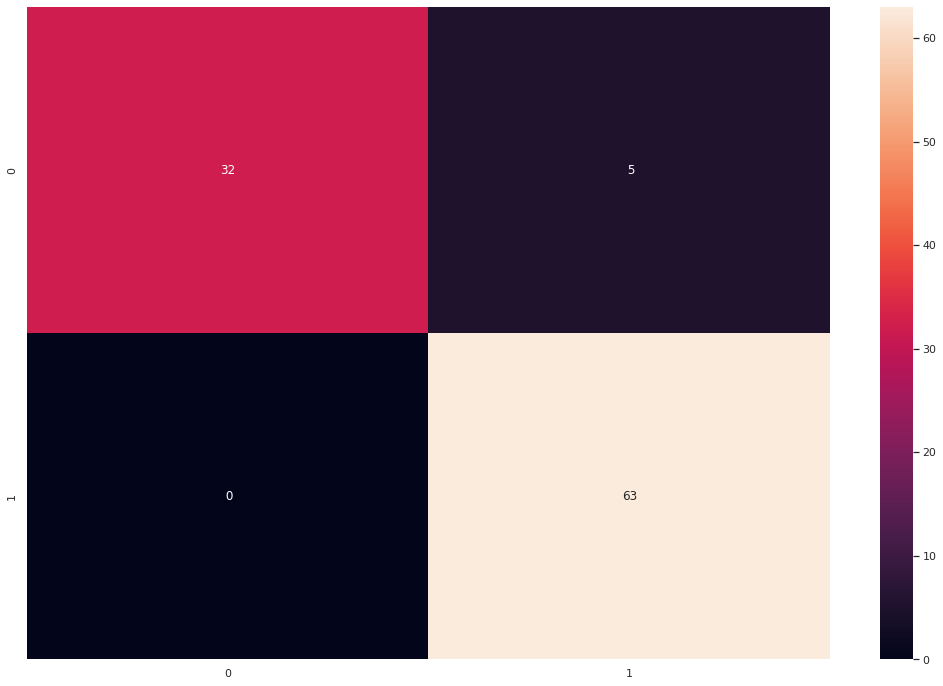

In [ ]:
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(18,12)})
cm = confusion_matrix(y_test, ypredict_knn)
sns.heatmap(cm,annot=True,fmt='2.0f')

on calcule les indicateurs des métriques de modele KNN : 
- Accuracy =(TN+TP)/(TP+TN+FN+FP)=(63+32)/(63+32+5)=0.95
- Precision =TP/(TP+FP)=1
- Negative Predictive Value=TN/(TN+FN)=63/(63+5)=0.93
- Specificity =TP/(TN+FP)=32/(63+0)=0.5
- Sensitivity =TP/(TP+FN)=32/(32+5)=0.82

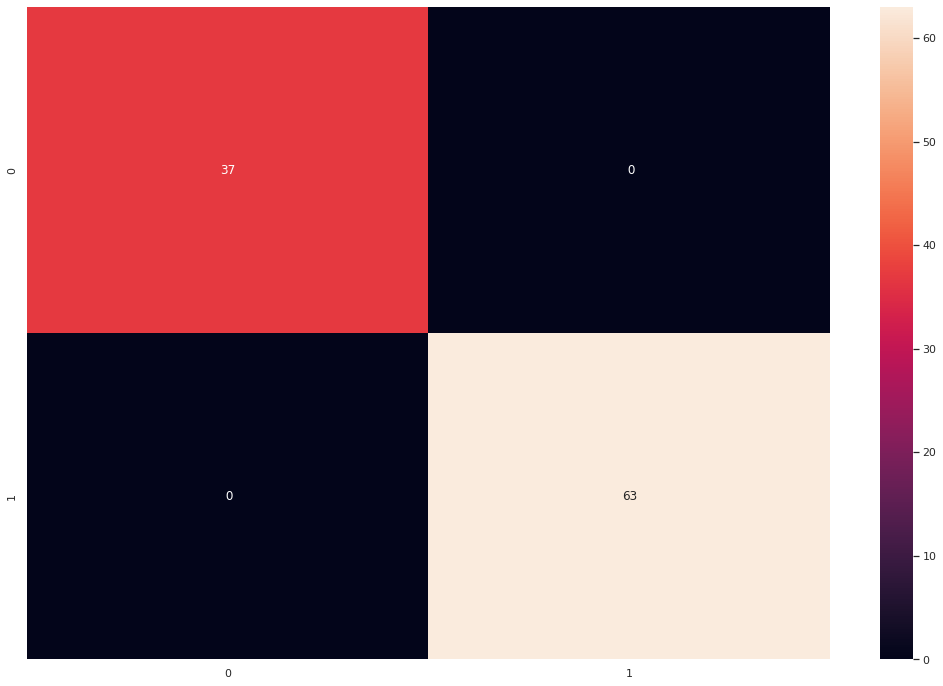

In [ ]:
cm1 = confusion_matrix(y_test, ypredict_svm)
sns.heatmap(cm1,annot=True,fmt='2.0f')


on calcule les indicateurs des métriques de modele SVM lineair :

- Accuracy =(TN+TP)/(TP+TN+FN+FP)=1
- Precision =TP/(TP+FP)=1
- Negative Predictive Value=TN/(TN+FN)=1
- Specificity =TP/(TN+FP)=0.58
- Sensitivity =TP/(TP+FN)=1

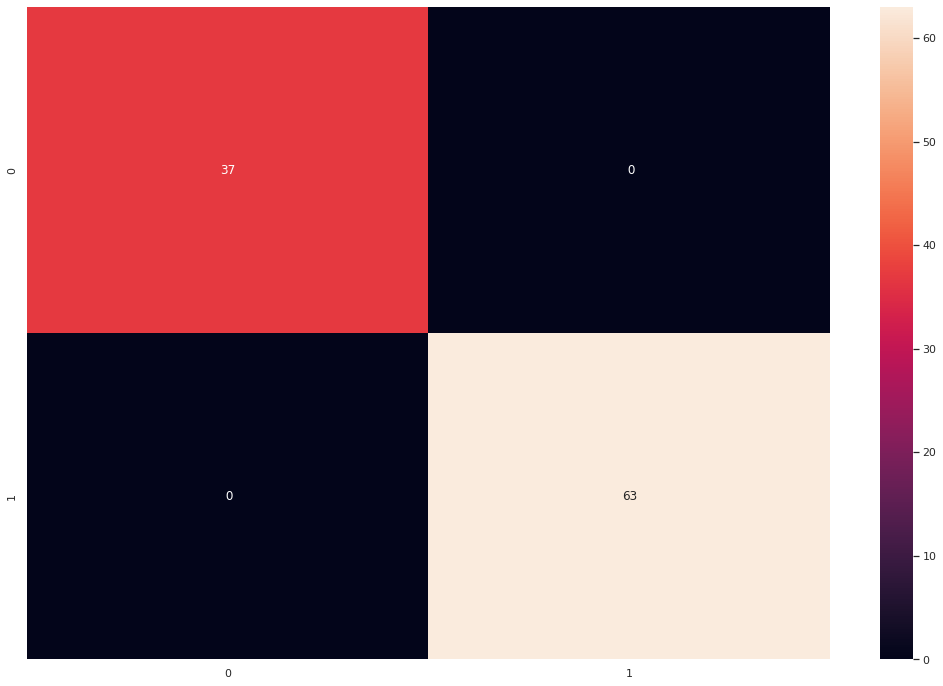

In [78]:
cm2 = confusion_matrix(y_test, ypredict_svmGaussian)
sns.heatmap(cm2,annot=True,fmt='2.0f')


on calcule les indicateurs des métriques de modele SVM Gaussian :

- Accuracy =(TN+TP)/(TP+TN+FN+FP)=1
- Precision =TP/(TP+FP)=1
- Negative Predictive Value=TN/(TN+FN)=1
- Specificity =TP/(TN+FP)=0.58
- Sensitivity =TP/(TP+FN)=1

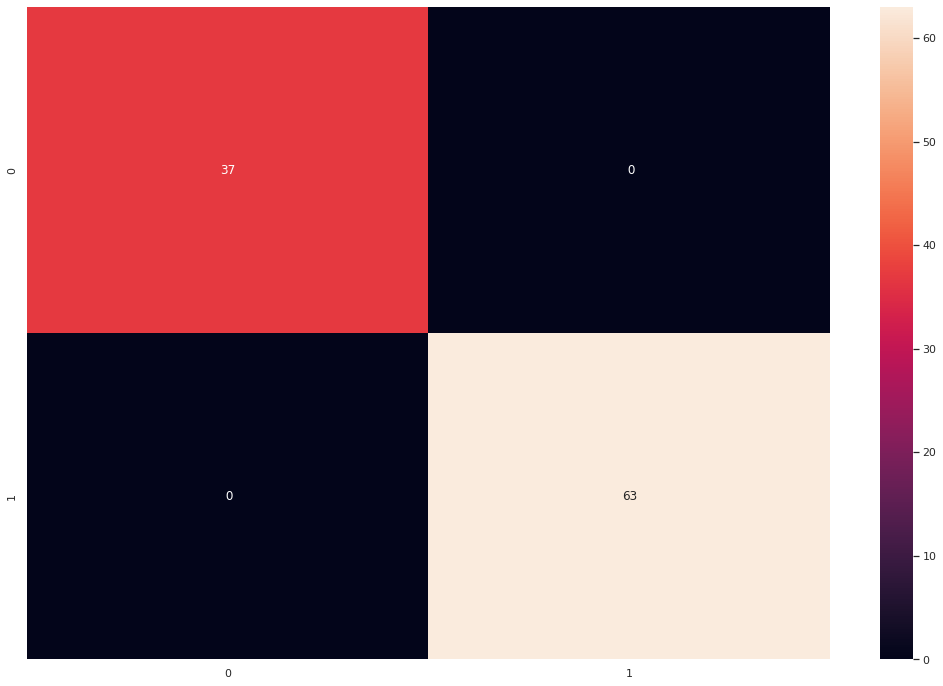

In [79]:
cm3 = confusion_matrix(y_test, ypredict_mlp)
sns.heatmap(cm1,annot=True,fmt='2.0f')